## **Nombres:** Antony Isaac Huaman Hermoza
## **Código:** 170434

_______________________________________________
# **Aplicación del algoritmo a un archivo**
_______________________________________________

## **Instalamos PySpark**

In [1]:
! pip install pyspark

     |████████████████████████████████| 281.3 MB 39 kB/s 
     |████████████████████████████████| 198 kB 63.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=b9fb890a7be67eb6ed40c0c0128c4fb9a863a47fbb49dc63c5dc6f8c860f3392
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


## **Importamos librerías**

In [2]:
from pyspark import SparkContext
sc = SparkContext()

## **Leemos el coorpus**

In [3]:
def Leer(pArchivo):
  Tuplas=[]
  RDD = sc.textFile(pArchivo,100)
  i=1
  for Linea in RDD.collect():
    if len(Linea) != 0: 
      Tup=(i,Linea)
      Tuplas.append(Tup)
      i+=1
  return Tuplas

## **Leemos el coorpus y analizamos su contenido**

In [9]:
data = Leer('twitts.txt')
lines = sc.parallelize(data)
lines.collect()

[(1, 'protester stage diein protest store nyc anger misplace retweet agree'),
 (2,
  'apple intraday comment update range premium user aapl stockaction trading stock mkt'),
 (3, 'ios app 2014 name elevate brain training iphone app'),
 (4, 'shit'),
 (5, 'founder attack boss ridiculous comment ad'),
 (6, 'evidence factcheckthis'),
 (7, 'educate'),
 (8, 'hard reach buy suicide squad comic_strip apple store turkey'),
 (9, 'delete music customer ipod'),
 (10,
  'apple intraday comment update range premium user aapl stockaction trading stock mkt'),
 (11, 'studio 45,000 outlet computer need battery future'),
 (12, 'apple great business aapl investwall aapl'),
 (13, 'dear love iphone plus lot great achievement iphone reboot day fail'),
 (14,
  'survey feedback iwatch positioning fashion accessory geek centric gadget'),
 (15, 'similar cloud backup picture onlinefootprint modicumofprudence'),
 (16, 'protester stage diein protest store nyc anger misplace retweet agree'),
 (17, 'fuck make shit pro

## **Asignamos pares claves / valor a un nuevo par clave / valor**

In [11]:
map1=lines.flatMap(lambda x: [((x[0],i),1) for i in x[1].split()])
map1.collect()

[((1, 'protester'), 1),
 ((1, 'stage'), 1),
 ((1, 'diein'), 1),
 ((1, 'protest'), 1),
 ((1, 'store'), 1),
 ((1, 'nyc'), 1),
 ((1, 'anger'), 1),
 ((1, 'misplace'), 1),
 ((1, 'retweet'), 1),
 ((1, 'agree'), 1),
 ((2, 'apple'), 1),
 ((2, 'intraday'), 1),
 ((2, 'comment'), 1),
 ((2, 'update'), 1),
 ((2, 'range'), 1),
 ((2, 'premium'), 1),
 ((2, 'user'), 1),
 ((2, 'aapl'), 1),
 ((2, 'stockaction'), 1),
 ((2, 'trading'), 1),
 ((2, 'stock'), 1),
 ((2, 'mkt'), 1),
 ((3, 'ios'), 1),
 ((3, 'app'), 1),
 ((3, '2014'), 1),
 ((3, 'name'), 1),
 ((3, 'elevate'), 1),
 ((3, 'brain'), 1),
 ((3, 'training'), 1),
 ((3, 'iphone'), 1),
 ((3, 'app'), 1),
 ((4, 'shit'), 1),
 ((5, 'founder'), 1),
 ((5, 'attack'), 1),
 ((5, 'boss'), 1),
 ((5, 'ridiculous'), 1),
 ((5, 'comment'), 1),
 ((5, 'ad'), 1),
 ((6, 'evidence'), 1),
 ((6, 'factcheckthis'), 1),
 ((7, 'educate'), 1),
 ((8, 'hard'), 1),
 ((8, 'reach'), 1),
 ((8, 'buy'), 1),
 ((8, 'suicide'), 1),
 ((8, 'squad'), 1),
 ((8, 'comic_strip'), 1),
 ((8, 'apple'), 1)

## **Reducimos de pares clave / valor**

In [12]:
reduce=map1.reduceByKey(lambda x,y:x+y)
reduce.collect()

[((1, 'protester'), 1),
 ((1, 'diein'), 1),
 ((1, 'agree'), 1),
 ((2, 'update'), 1),
 ((2, 'aapl'), 1),
 ((2, 'stockaction'), 1),
 ((3, 'ios'), 1),
 ((3, 'app'), 2),
 ((3, 'brain'), 1),
 ((3, 'iphone'), 1),
 ((4, 'shit'), 1),
 ((5, 'founder'), 1),
 ((5, 'attack'), 1),
 ((5, 'ridiculous'), 1),
 ((5, 'comment'), 1),
 ((5, 'ad'), 1),
 ((6, 'evidence'), 1),
 ((8, 'suicide'), 1),
 ((8, 'store'), 1),
 ((8, 'turkey'), 1),
 ((9, 'ipod'), 1),
 ((10, 'update'), 1),
 ((10, 'aapl'), 1),
 ((10, 'stockaction'), 1),
 ((11, 'studio'), 1),
 ((11, 'outlet'), 1),
 ((11, 'computer'), 1),
 ((11, 'need'), 1),
 ((11, 'future'), 1),
 ((12, 'business'), 1),
 ((12, 'aapl'), 2),
 ((12, 'investwall'), 1),
 ((13, 'dear'), 1),
 ((13, 'iphone'), 2),
 ((13, 'plus'), 1),
 ((13, 'lot'), 1),
 ((13, 'great'), 1),
 ((13, 'achievement'), 1),
 ((13, 'day'), 1),
 ((13, 'fail'), 1),
 ((14, 'survey'), 1),
 ((14, 'feedback'), 1),
 ((14, 'iwatch'), 1),
 ((14, 'accessory'), 1),
 ((14, 'gadget'), 1),
 ((15, 'backup'), 1),
 ((15, '

## **Volvemos a realizar un mapeo**

In [13]:
tf=reduce.map(lambda x: (x[0][1],(x[0][0],x[1])))
tf.collect()

[('protester', (1, 1)),
 ('diein', (1, 1)),
 ('agree', (1, 1)),
 ('update', (2, 1)),
 ('aapl', (2, 1)),
 ('stockaction', (2, 1)),
 ('ios', (3, 1)),
 ('app', (3, 2)),
 ('brain', (3, 1)),
 ('iphone', (3, 1)),
 ('shit', (4, 1)),
 ('founder', (5, 1)),
 ('attack', (5, 1)),
 ('ridiculous', (5, 1)),
 ('comment', (5, 1)),
 ('ad', (5, 1)),
 ('evidence', (6, 1)),
 ('suicide', (8, 1)),
 ('store', (8, 1)),
 ('turkey', (8, 1)),
 ('ipod', (9, 1)),
 ('update', (10, 1)),
 ('aapl', (10, 1)),
 ('stockaction', (10, 1)),
 ('studio', (11, 1)),
 ('outlet', (11, 1)),
 ('computer', (11, 1)),
 ('need', (11, 1)),
 ('future', (11, 1)),
 ('business', (12, 1)),
 ('aapl', (12, 2)),
 ('investwall', (12, 1)),
 ('dear', (13, 1)),
 ('iphone', (13, 2)),
 ('plus', (13, 1)),
 ('lot', (13, 1)),
 ('great', (13, 1)),
 ('achievement', (13, 1)),
 ('day', (13, 1)),
 ('fail', (13, 1)),
 ('survey', (14, 1)),
 ('feedback', (14, 1)),
 ('iwatch', (14, 1)),
 ('accessory', (14, 1)),
 ('gadget', (14, 1)),
 ('backup', (15, 1)),
 ('pictu

# **Calculamos IDF**
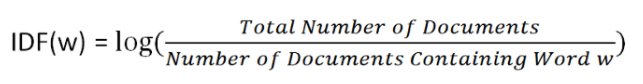

In [14]:
# Realizamos un mapeo para IDF
# Asignaremos el par clave / valor anterior a un nuevo par clave / valor.
map3=reduce.map(lambda x: (x[0][1],(x[0][0],x[1],1)))
map3.collect()

[('protester', (1, 1, 1)),
 ('diein', (1, 1, 1)),
 ('agree', (1, 1, 1)),
 ('update', (2, 1, 1)),
 ('aapl', (2, 1, 1)),
 ('stockaction', (2, 1, 1)),
 ('ios', (3, 1, 1)),
 ('app', (3, 2, 1)),
 ('brain', (3, 1, 1)),
 ('iphone', (3, 1, 1)),
 ('shit', (4, 1, 1)),
 ('founder', (5, 1, 1)),
 ('attack', (5, 1, 1)),
 ('ridiculous', (5, 1, 1)),
 ('comment', (5, 1, 1)),
 ('ad', (5, 1, 1)),
 ('evidence', (6, 1, 1)),
 ('suicide', (8, 1, 1)),
 ('store', (8, 1, 1)),
 ('turkey', (8, 1, 1)),
 ('ipod', (9, 1, 1)),
 ('update', (10, 1, 1)),
 ('aapl', (10, 1, 1)),
 ('stockaction', (10, 1, 1)),
 ('studio', (11, 1, 1)),
 ('outlet', (11, 1, 1)),
 ('computer', (11, 1, 1)),
 ('need', (11, 1, 1)),
 ('future', (11, 1, 1)),
 ('business', (12, 1, 1)),
 ('aapl', (12, 2, 1)),
 ('investwall', (12, 1, 1)),
 ('dear', (13, 1, 1)),
 ('iphone', (13, 2, 1)),
 ('plus', (13, 1, 1)),
 ('lot', (13, 1, 1)),
 ('great', (13, 1, 1)),
 ('achievement', (13, 1, 1)),
 ('day', (13, 1, 1)),
 ('fail', (13, 1, 1)),
 ('survey', (14, 1, 1)),


In [15]:
# Reliazamos otro mapeo
# Extraeremos el token y el número de contador de 1 que representa 
# su ocurrencia en ciertos documentos.
map4=map3.map(lambda x:(x[0],x[1][2]))
map4.collect()

[('protester', 1),
 ('diein', 1),
 ('agree', 1),
 ('update', 1),
 ('aapl', 1),
 ('stockaction', 1),
 ('ios', 1),
 ('app', 1),
 ('brain', 1),
 ('iphone', 1),
 ('shit', 1),
 ('founder', 1),
 ('attack', 1),
 ('ridiculous', 1),
 ('comment', 1),
 ('ad', 1),
 ('evidence', 1),
 ('suicide', 1),
 ('store', 1),
 ('turkey', 1),
 ('ipod', 1),
 ('update', 1),
 ('aapl', 1),
 ('stockaction', 1),
 ('studio', 1),
 ('outlet', 1),
 ('computer', 1),
 ('need', 1),
 ('future', 1),
 ('business', 1),
 ('aapl', 1),
 ('investwall', 1),
 ('dear', 1),
 ('iphone', 1),
 ('plus', 1),
 ('lot', 1),
 ('great', 1),
 ('achievement', 1),
 ('day', 1),
 ('fail', 1),
 ('survey', 1),
 ('feedback', 1),
 ('iwatch', 1),
 ('accessory', 1),
 ('gadget', 1),
 ('backup', 1),
 ('picture', 1),
 ('stage', 1),
 ('protest', 1),
 ('store', 1),
 ('nyc', 1),
 ('anger', 1),
 ('misplace', 1),
 ('retweet', 1),
 ('product', 1),
 ('try', 1),
 ('turn', 1),
 ('macbook', 1),
 ('pro', 1),
 ('window', 1),
 ('computer', 1),
 ('etc', 1),
 ('speak', 1),


In [16]:
# Reducimos por clave
# Reduciremos por clave para obtener 
# el recuento de documentos que contienen un token w particular.
reduce2=map4.reduceByKey(lambda x,y:x+y)
reduce2.collect()

[('update', 154),
 ('aapl', 970),
 ('stockaction', 36),
 ('shit', 78),
 ('evidence', 7),
 ('suicide', 2),
 ('store', 299),
 ('turkey', 2),
 ('business', 14),
 ('investwall', 1),
 ('survey', 5),
 ('feedback', 3),
 ('iwatch', 9),
 ('accessory', 4),
 ('gadget', 3),
 ('stage', 159),
 ('protest', 160),
 ('nyc', 169),
 ('anger', 156),
 ('misplace', 155),
 ('retweet', 152),
 ('try', 40),
 ('turn', 26),
 ('speak', 9),
 ('new', 180),
 ('run', 11),
 ('tl_chat', 4),
 ('thanks', 8),
 ('call', 19),
 ('facetime', 14),
 ('seamlessly', 2),
 ('inc', 120),
 ('airport', 1),
 ('board', 5),
 ('pass', 10),
 ('phone', 165),
 ('security', 14),
 ('card', 16),
 ('take', 28),
 ('ask', 16),
 ('use', 50),
 ('ace', 1),
 ('vocal', 1),
 ('clone', 4),
 ('commute', 2),
 ('accord', 11),
 ('help', 48),
 ('iphone6', 70),
 ('iphone6plus', 24),
 ('checkitout', 1),
 ('ceo', 41),
 ('warn', 4),
 ('maker', 7),
 ('like', 103),
 ('afp', 1),
 ('reveal', 13),
 ('warrant', 2),
 ('pushback', 1),
 ('tax', 1),
 ('rip', 1),
 ('aussie', 

In [17]:
# Asignaremos esta salida final con la 
# transformación logarítmica para calcular la puntuación IDF.
import math
from pyspark.sql.functions import *
idf=reduce2.map(lambda x: (x[0],math.log10(len(data)/x[1])))
idf.collect()

[('update', 1.3937460844372076),
 ('aapl', 0.5944950710074257),
 ('stockaction', 2.0249643045063834),
 ('shit', 1.6891722025831901),
 ('evidence', 2.7361687652594138),
 ('suicide', 3.2802368096096894),
 ('store', 1.105595616949241),
 ('turkey', 3.2802368096096894),
 ('business', 2.4351387695954325),
 ('investwall', 3.5812668052736707),
 ('survey', 2.882296800937652),
 ('feedback', 3.104145550554008),
 ('iwatch', 2.627024295834346),
 ('accessory', 2.979206813945708),
 ('gadget', 3.104145550554008),
 ('stage', 1.3798696809532192),
 ('protest', 1.377146822617746),
 ('nyc', 1.353380100659997),
 ('anger', 1.388142206919209),
 ('misplace', 1.390935107103379),
 ('retweet', 1.399423217328898),
 ('try', 1.9792068139457082),
 ('turn', 2.1662934573028525),
 ('speak', 2.627024295834346),
 ('new', 1.3259943001703645),
 ('run', 2.5398741201154458),
 ('tl_chat', 2.979206813945708),
 ('thanks', 2.678176818281727),
 ('call', 2.3025132043208414),
 ('facetime', 2.4351387695954325),
 ('seamlessly', 3.2802

# **Calculamos TD-IDF**

In [18]:
rdd=tf.join(idf)
rdd.collect()

[('aapl', ((2, 1), 0.5944950710074257)),
 ('aapl', ((10, 1), 0.5944950710074257)),
 ('aapl', ((12, 2), 0.5944950710074257)),
 ('aapl', ((24, 1), 0.5944950710074257)),
 ('aapl', ((30, 1), 0.5944950710074257)),
 ('aapl', ((44, 2), 0.5944950710074257)),
 ('aapl', ((56, 1), 0.5944950710074257)),
 ('aapl', ((68, 1), 0.5944950710074257)),
 ('aapl', ((72, 1), 0.5944950710074257)),
 ('aapl', ((96, 1), 0.5944950710074257)),
 ('aapl', ((100, 1), 0.5944950710074257)),
 ('aapl', ((104, 2), 0.5944950710074257)),
 ('aapl', ((108, 2), 0.5944950710074257)),
 ('aapl', ((112, 1), 0.5944950710074257)),
 ('aapl', ((118, 1), 0.5944950710074257)),
 ('aapl', ((122, 1), 0.5944950710074257)),
 ('aapl', ((124, 1), 0.5944950710074257)),
 ('aapl', ((140, 2), 0.5944950710074257)),
 ('aapl', ((150, 2), 0.5944950710074257)),
 ('aapl', ((164, 2), 0.5944950710074257)),
 ('aapl', ((166, 3), 0.5944950710074257)),
 ('aapl', ((168, 3), 0.5944950710074257)),
 ('aapl', ((196, 1), 0.5944950710074257)),
 ('aapl', ((206, 1), 0

In [19]:
# Asignaremos esta función para multiplicar los valores TF e IDF de cada token 
# asociado con la identificación del documento respectivo.
rdd=rdd.map(lambda x: (x[1][0][0],(x[0],x[1][0][1],x[1][1],x[1][0][1]*x[1][1]))).sortByKey()
rdd.collect()

[(1, ('store', 1, 1.105595616949241, 1.105595616949241)),
 (1, ('stage', 1, 1.3798696809532192, 1.3798696809532192)),
 (1, ('nyc', 1, 1.353380100659997, 1.353380100659997)),
 (1, ('protester', 1, 1.388142206919209, 1.388142206919209)),
 (1, ('diein', 1, 1.399423217328898, 1.399423217328898)),
 (1, ('protest', 1, 1.377146822617746, 1.377146822617746)),
 (1, ('anger', 1, 1.388142206919209, 1.388142206919209)),
 (1, ('misplace', 1, 1.390935107103379, 1.390935107103379)),
 (1, ('retweet', 1, 1.399423217328898, 1.399423217328898)),
 (1, ('agree', 1, 1.3690792008697128, 1.3690792008697128)),
 (2, ('aapl', 1, 0.5944950710074257, 0.5944950710074257)),
 (2, ('stockaction', 1, 2.0249643045063834, 2.0249643045063834)),
 (2, ('mkt', 1, 1.968482948553935, 1.968482948553935)),
 (2, ('range', 1, 2.2195389692560776, 2.2195389692560776)),
 (2, ('user', 1, 1.8178388117107334, 1.8178388117107334)),
 (2, ('trading', 1, 1.928054291498327, 1.928054291498327)),
 (2, ('stock', 1, 1.457415164306585, 1.45741516

## **Convirtamos la salida final a un marco de datos de Pyspark para visualizar las puntuaciones con mayor claridad y compararlas con las puntuaciones reales de TF-IDF calculadas teóricamente.**

In [24]:
from pyspark.sql.types import Row
rdd=rdd.map(lambda x: (x[0],x[1][0],x[1][1],x[1][2],x[1][3]))

In [ ]:
#Mostramos cuadro
rdd.toDF(["DocumentId","Token","TF","IDF","TF-IDF"]).show()